In [2]:
library('tidyverse')
library('reshape2')
library('gganimate')

In [3]:
private = read.csv('solar-energy-production-forecasting-privateleaderboard-2023-11-14T12:50:45.csv')
public = read.csv(('solar-energy-production-forecasting-publicleaderboard-2023-11-14T12:57:25.csv'))

In [4]:
private = private %>% select(-one_of('LastSubmissionDate', 'TeamMemberUserNames'))
public = public %>% select(-one_of('LastSubmissionDate', 'TeamMemberUserNames'))



In [5]:
private['Type'] = "Private"
public['Type'] = "Public"


In [6]:

private = private[private$Score < 190.08502, ] #Keep Team Lyngvartsen ut of both, keep size equal

public = public[public$Score < 183.506486, ]


In [7]:
privateA = private[private$Score < 156.153237, ]
A_Id = privateA$TeamId

totalA = merge(privateA, public, by = c("TeamId",'SubmissionCount' , 'TeamName'))

A_priv = totalA[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.x', 'Score.x', 'Type.x')]
A_pub = totalA[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.y', 'Score.y', 'Type.y')]

A_priv = A_priv %>% rename(Rank = Rank.x, Score = Score.x, Type = Type.x )
A_pub = A_pub %>% rename(Rank = Rank.y, Score = Score.y, Type = Type.y )

totalA = rbind(A_pub, A_priv)
# totalA = totalA[order(-totalA$Type, totalA$Score),]
totalA$Grade = 'A'


In [8]:
privateB = private[private$Score >= 156.153237 & private$Score < 158.597551, ]
B_Id = privateB$TeamId

totalB = merge(privateB, public, by = c("TeamId",'SubmissionCount' , 'TeamName'))

B_priv = totalB[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.x', 'Score.x', 'Type.x')]
B_pub = totalB[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.y', 'Score.y', 'Type.y')]

B_priv = B_priv %>% rename(Rank = Rank.x, Score = Score.x, Type = Type.x )
B_pub = B_pub %>% rename(Rank = Rank.y, Score = Score.y, Type = Type.y )

totalB = rbind(B_pub, B_priv)
# totalB = totalB[order(-totalB$Type, totalB$Score), ]
totalB$Grade = 'B'

In [9]:
privateC = private[private$Score >= 158.597551 & private$Score < 163.671764, ]
C_Id = privateC$TeamId

totalC = merge(privateC, public, by = c("TeamId",'SubmissionCount' , 'TeamName'))

C_priv = totalC[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.x', 'Score.x', 'Type.x')]
C_pub = totalC[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.y', 'Score.y', 'Type.y')]

C_priv = C_priv %>% rename(Rank = Rank.x, Score = Score.x, Type = Type.x )
C_pub = C_pub %>% rename(Rank = Rank.y, Score = Score.y, Type = Type.y )

totalC = rbind(C_pub, C_priv)
# totalC = totalC[order(-totalC$Type, totalC$Score), ]
totalC$Grade = 'C'

In [10]:
privateD = private[private$Score >= 163.671764, ]
D_Id = privateD$TeamId

totalD = merge(privateD, public, by = c("TeamId",'SubmissionCount' , 'TeamName'))

D_priv = totalD[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.x', 'Score.x', 'Type.x')]
D_pub = totalD[c('TeamId', 'SubmissionCount', 'TeamName', 'Rank.y', 'Score.y', 'Type.y')]

D_priv = D_priv %>% rename(Rank = Rank.x, Score = Score.x, Type = Type.x )
D_pub = D_pub %>% rename(Rank = Rank.y, Score = Score.y, Type = Type.y )

totalD = rbind(D_pub, D_priv)
# totalD = totalD[order(-totalD$Type, totalD$Score), ]
totalD$Grade = 'D'


In [11]:
totalGrade = rbind(rbind(totalA,totalB),rbind(totalC,totalD))


In [12]:
VT = totalGrade[totalGrade$Rank == 0, ]

In [23]:
VT_ABC = VT[VT$Grade != "D", ]


In [26]:
VT_ABC

,TeamId,SubmissionCount,TeamName,Rank,Score,Type,Grade
,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>
72,11233210,1,[VT] Goslightning,0,142.7689,Public,A
144,11233210,1,[VT] Goslightning,0,152.5805,Private,A
164,11099471,1,[VT] KenO,0,146.5270,Public,B
165,11099473,1,[VT] Shao RyKhan,0,145.3757,Public,B
191,11099471,1,[VT] KenO,0,157.6017,Private,B
192,11099473,1,[VT] Shao RyKhan,0,156.1532,Private,B
199,10952991,1,[VT] La La Lizard,0,147.7990,Public,C
200,10952993,1,[VT] Frostling,0,151.8526,Public,C
239,10952991,1,[VT] La La Lizard,0,158.5976,Private,C


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


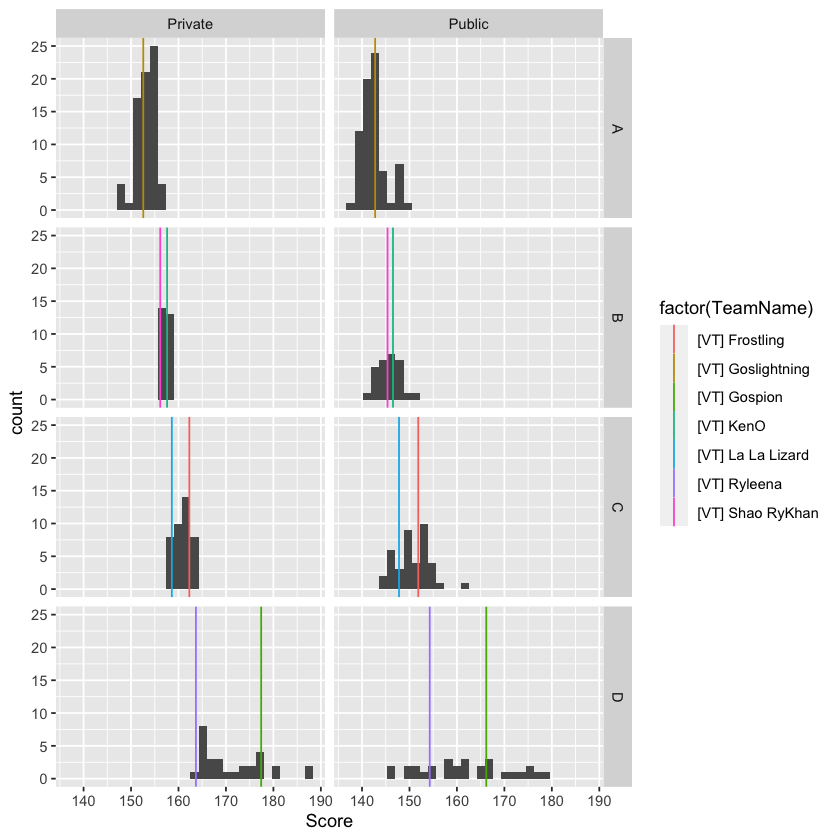

In [28]:
ggplot(data = totalGrade) +
    geom_histogram(aes(x = Score)) +
    facet_grid(Grade ~ Type)+
    geom_vline(data = VT, aes(xintercept = Score, color = factor(TeamName)))

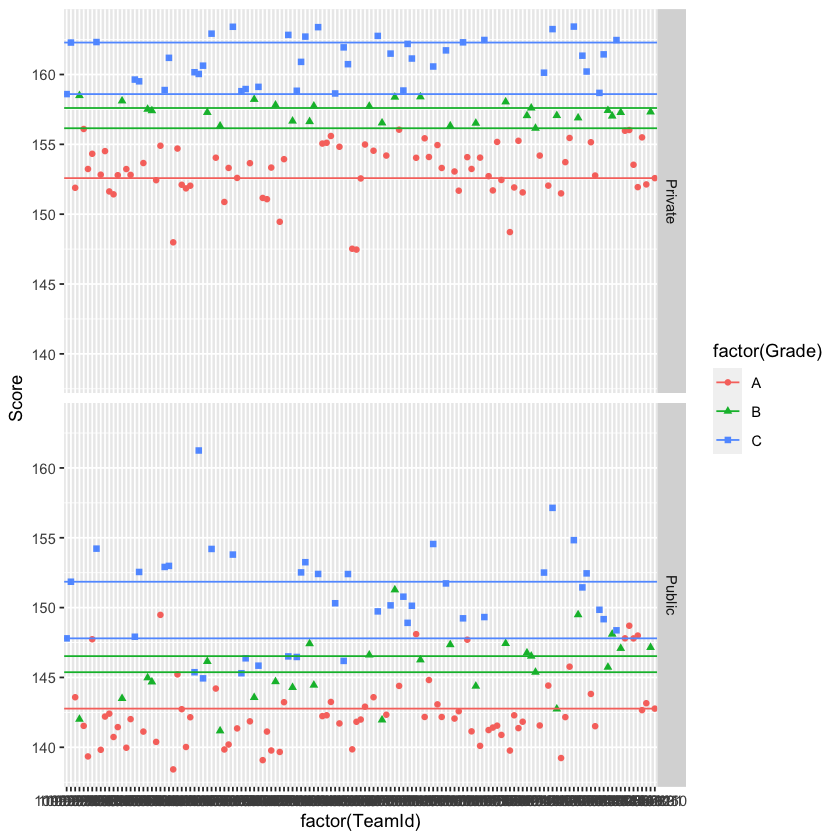

In [24]:
gradeABC = rbind(rbind(totalA,totalB),totalC)


ggplot(data = gradeABC) +
    geom_point(aes(x = factor(TeamId), y = Score , color = factor(Grade), shape = factor(Grade))) +
    geom_hline(data = VT_ABC, aes(yintercept = Score, color = factor(Grade))) +
    facet_grid(Type ~ .)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


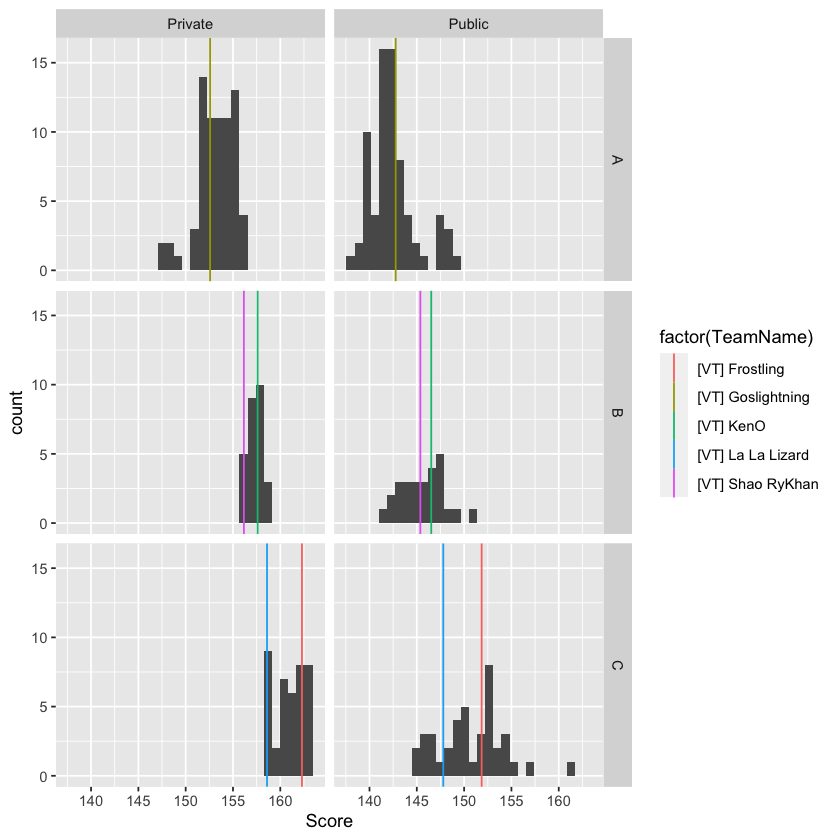

In [27]:
#plot the difference of public and private score (y) as a function of the public score (x).
ggplot(data = gradeABC) +
    geom_histogram(aes(x = Score)) +
    geom_vline(data = VT_ABC, aes(xintercept = Score, color = factor(TeamName))) +
    facet_grid(Grade ~ Type)


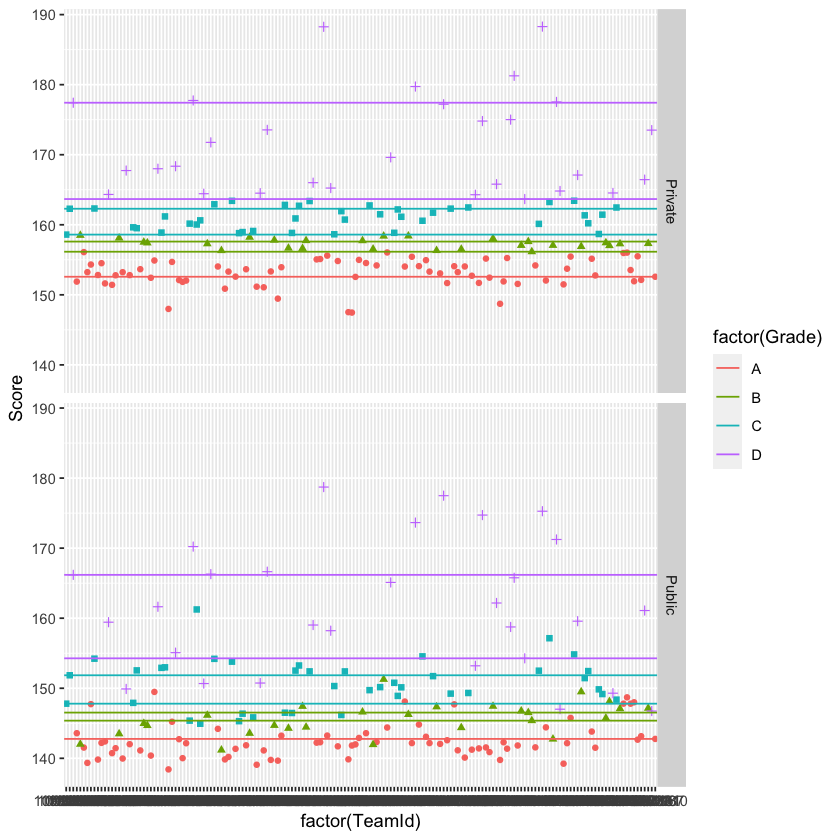

In [89]:

# Add a feature to the data with number of grades changed form prublic to private. color this var. shape the grades
# y = seq_along(totalGrade[totalGrade$Type == 0, ]$TeamId)
# check for only C and better

ggplot(data = totalGrade) +
    geom_point(aes(x = factor(TeamId), y = Score , color = factor(Grade), shape = factor(Grade)), show.legend = FALSE) +
    geom_hline(data = VT, aes(yintercept = Score, color = factor(Grade))) +
    facet_grid(Type ~ .)



Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


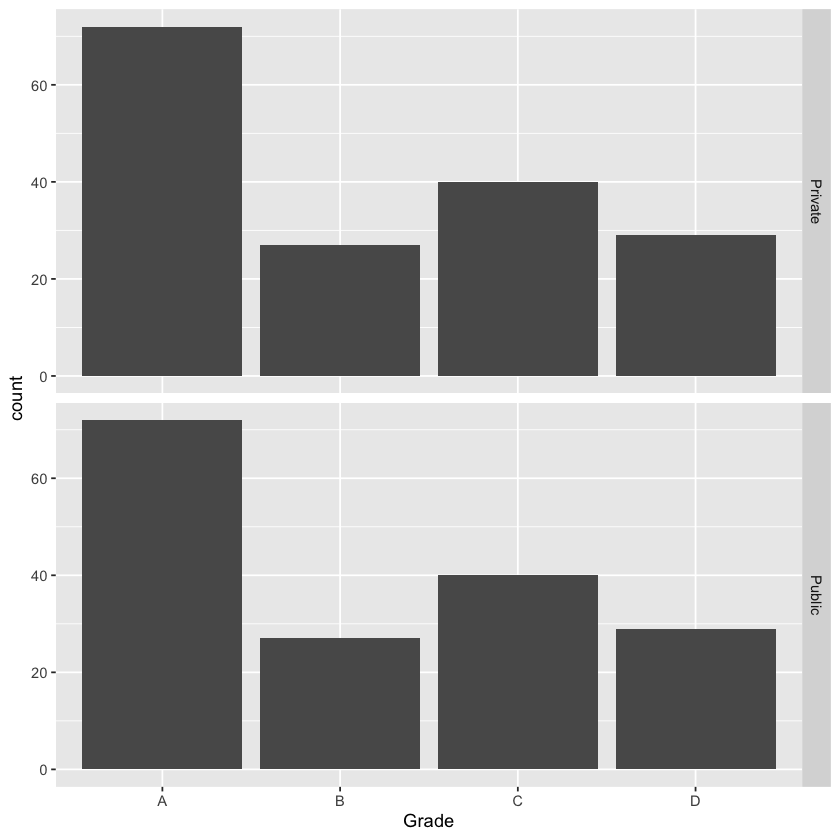

In [31]:
ggplot(data = totalGrade, aes(x=Grade)) +
    geom_histogram(stat = "count") +
    facet_grid(Type ~ .)

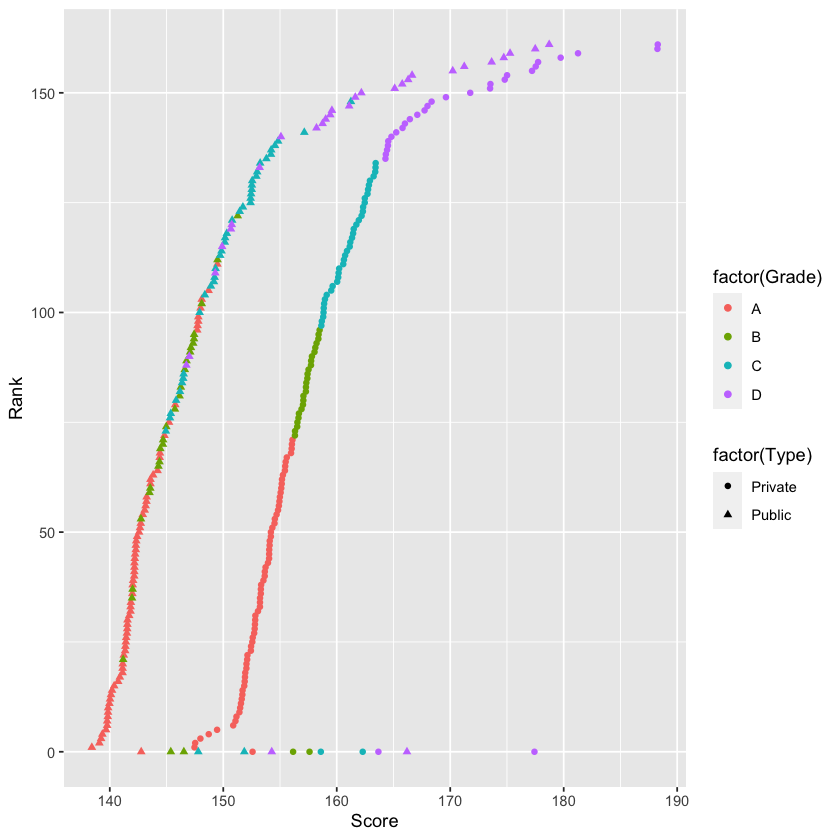

In [94]:
ggplot(data = totalGrade, aes(x = Score, y = Rank, color = factor(Grade), shape = factor(Type))) + 
    geom_point()



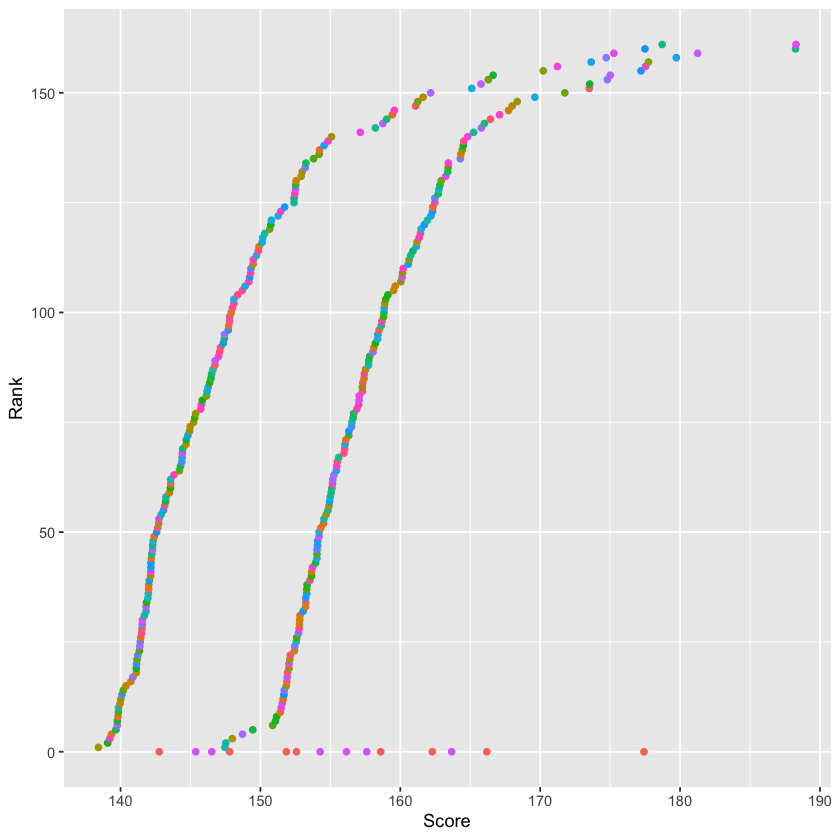

In [95]:
ggplot(data = total, aes(x = Score, y = Rank, color = factor(TeamId), show.legend = FALSE)) + 
    geom_point(show.legend = FALSE)